# Breast Cancer Wisconsin (Diagnostic) Dataset – Visual Exploration

Breast cancer remains one of the most common and deadly forms of cancer among women worldwide. Early and accurate diagnosis is critical for effective treatment and survival. As part of a broader effort to build predictive tools for breast cancer detection, this notebook focuses on a crucial first step: understanding and exploring the data.

This notebook provides a structured, visually-supported analysis of the **Breast Cancer Wisconsin (Diagnostic)** dataset, available on Kaggle. The dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. Each sample is classified as either **Malignant (M)** or **Benign (B)**.

### Objectives:
- Understand the structure and key components of the dataset.
- Explore the distribution of the target variable (`diagnosis`) and related features.
- Identify potential patterns and insights that can inform future modeling steps.

> This exploratory phase lays the foundation for subsequent work in developing machine learning algorithms for breast cancer diagnosis.


### Install kagglehub to access the dataset directly from Kaggle

In [18]:
!pip install kagglehub

### Dataset Download

We use `kagglehub` to download the Breast Cancer Wisconsin (Diagnostic) dataset directly from Kaggle. 
This ensures we are working with the latest available version.

In [150]:
import kagglehub

# Downloads and returns the local path
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\miris\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


### Dataset Preview

We display the first 10 rows of the dataset to examine its structure, observe example values, and verify that the data has been loaded correctly.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from local KaggleHub cache path
file_path = r"C:\Users\miris\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv"

df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

### Dataset Overview

The table above displays the first 10 entries of the **Breast Cancer Wisconsin (Diagnostic)** dataset.

Each row represents a tumor sample, and each column contains a specific measurement or attribute related to that sample:

- `id`: A unique identifier for each case (not used in analysis).
- `diagnosis`: The target variable — `M` stands for **Malignant**, `B` stands for **Benign**.
- `radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, etc.: These are statistical measurements computed from images of fine needle aspirates (FNA) of breast masses.
  - Each of these base features (e.g., `radius`, `texture`) is recorded as a **mean**, **standard error (se)**, and **worst (largest)** value across all pixels.

The dataset contains **30 numeric features** describing the shape, texture, and size of the cell nuclei. These features are key to understanding the differences between benign and malignant tumors, and will be the focus of our visual exploration.


### Dataset Structure

We examine the overall shape of the dataset and use `.info()` to review the data types and identify any potential missing values.


In [17]:
# Check dataset shape and summary information
print("Dataset shape:", df.shape)
# Drop the empty 'Unnamed: 32' column if it exists
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Verify the column is removed
print("Columns after dropping 'Unnamed: 32':")
print(df.columns)

df.info()

Dataset shape: (569, 32)
Columns after dropping 'Unnamed: 32':
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis      

### Feature Distribution Skewness

We compute the skewness of each numerical feature to assess the symmetry of their distributions. This helps identify variables that may require transformation before statistical analysis or modeling.


In [18]:
df.skew(numeric_only=True).sort_values(ascending=False)

id                         6.473752
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0

### Class Distribution: Malignant vs. Benign

We analyze the distribution of the target variable, `diagnosis`, to understand the balance between malignant (M) and benign (B) tumor cases. This is essential for evaluating class imbalance and guiding further analysis.


Malignant cases (M): 212
Benign cases (B): 357


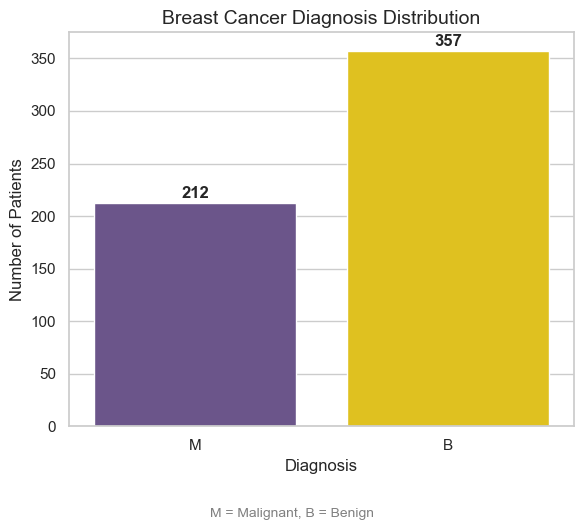

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Get class counts
class_counts = df['diagnosis'].value_counts()
benign_count = class_counts.get('B', 0)
malignant_count = class_counts.get('M', 0)

# Print summary before the plot
print(f"Malignant cases (M): {malignant_count}")
print(f"Benign cases (B): {benign_count}")

# Create the plot
plt.figure(figsize=(6, 5))
custom_palette = [ '#6A4C93', '#FFD700']  
ax = sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette = custom_palette, legend=False)

# Add value labels above bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f"{count}", (x, y + 5), ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Breast Cancer Diagnosis Distribution', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['M', 'B'], fontsize=11)
plt.yticks(fontsize=11)

# Add caption
plt.figtext(0.5, -0.05, "M = Malignant, B = Benign", wrap=True,
            horizontalalignment='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

### Diagnosis Distribution – Percentage View

To complement the count-based bar chart, we present a pie chart showing the percentage distribution of benign and malignant cases. This offers an intuitive view of the class imbalance and helps reinforce the understanding of dataset proportions.


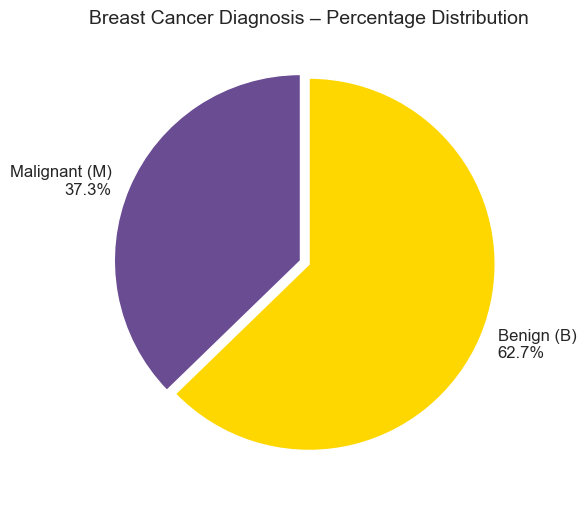

In [20]:
# Pie chart showing class distribution in percentages
labels = ['Benign (B)', 'Malignant (M)']
sizes = [benign_count, malignant_count]
custom_palette = [ '#FFD700', '#6A4C93']  
explode = (0, 0.05)  # Slightly separate the malignant slice

# Calculate percentages
percentages = [f'{(s / sum(sizes)) * 100:.1f}%' for s in sizes]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes,
        labels=[f'{l}\n{p}' for l, p in zip(labels, percentages)],
        colors=custom_palette,
        startangle=90,
        counterclock=False,
        explode=explode,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 12})

plt.title('Breast Cancer Diagnosis – Percentage Distribution', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Categorization

The 30 numeric features are grouped into three categories: `mean`, `standard error (se)`, and `worst`. This grouping reflects different statistical descriptors of tumor cell nuclei and will guide our feature-wise analysis.


In [21]:
# Separate features into their respective groups
mean_features = [col for col in df.columns if '_mean' in col]
se_features = [col for col in df.columns if '_se' in col]
worst_features = [col for col in df.columns if '_worst' in col]

print("Mean features:", len(mean_features))
print("SE features:", len(se_features))
print("Worst features:", len(worst_features))


Mean features: 10
SE features: 10
Worst features: 10


### Descriptive Statistics

We compute summary statistics (mean, standard deviation, min, max, etc.) to understand the range and variability of the features.


In [22]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

### Interactive Feature Distributions by Diagnosis (KDE + Histogram)

We define a reusable function to visualize the distribution of individual features for malignant and benign cases. Each plot includes a histogram and kernel density estimate (KDE), making it easy to compare the shapes of the distributions for each class.

The goal is to observe how feature values differ between the two groups and identify variables with strong discriminatory power.


In [23]:
# Split data by diagnosis
M = df[df['diagnosis'] == 'M']
B = df[df['diagnosis'] == 'B']

In [24]:
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)

We create a reusable function to plot feature distributions for benign vs malignant tumors. Each plot includes a histogram and KDE curve, allowing us to visually assess which features are most effective at separating the two classes.

Features that show clear differences in shape or range between the two groups are good candidates for predictive modeling.


In [25]:
def plot_distribution(feature, bin_size):
    """
    Plots the distribution of a given feature for malignant and benign diagnoses.
    Includes KDE and histogram using Plotly, with white background and horizontal grid lines.
    """
    malignant_values = M[feature]
    benign_values = B[feature]
    hist_data = [malignant_values, benign_values]

    group_labels = ['Malignant', 'Benign']
    colors = ['#6A4C93', '#FFD700']

    fig = ff.create_distplot(
        hist_data,
        group_labels,
        colors=colors,
        show_hist=True,
        bin_size=bin_size,
        curve_type='kde'
    )

    fig.update_layout(
        title_text=f'Distribution of {feature.replace("_", " ").title()}',
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(color='black'),
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            title=feature.replace("_", " ").title()
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=False,
            title='Density'
        ),
        legend=dict(bgcolor='white')
    )

    py.iplot(fig)


Below we plot selected features from each category (`mean`, `se`, and `worst`) to visually compare their distributions for benign and malignant tumors.

For clarity, only a few features are displayed here, but the function can be used to visualize all.


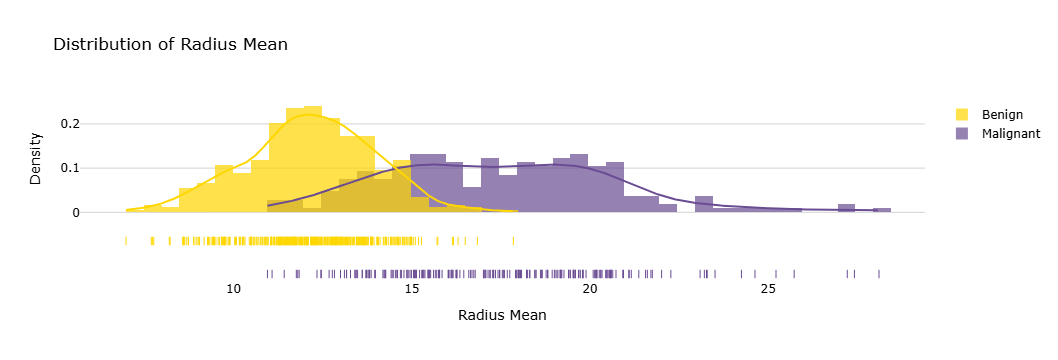

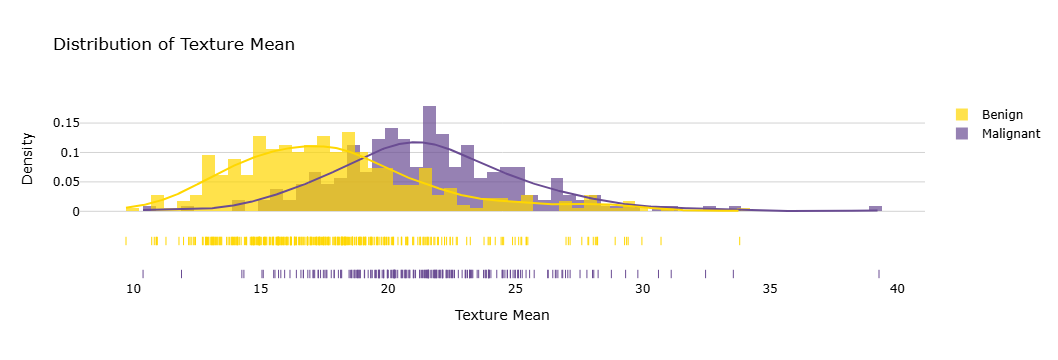

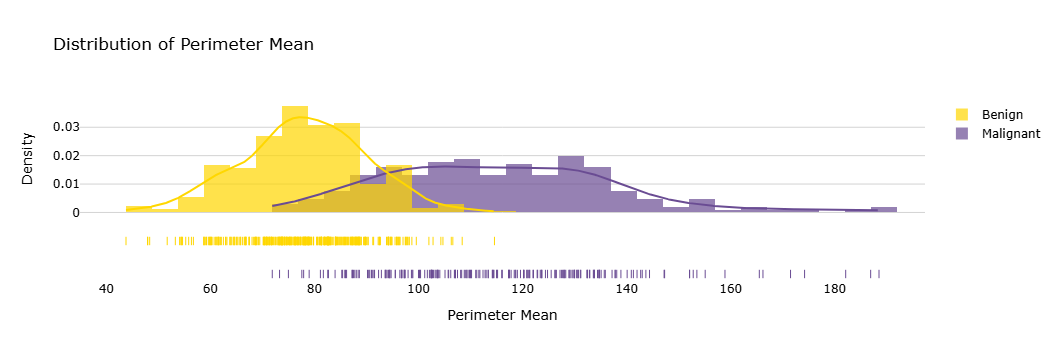

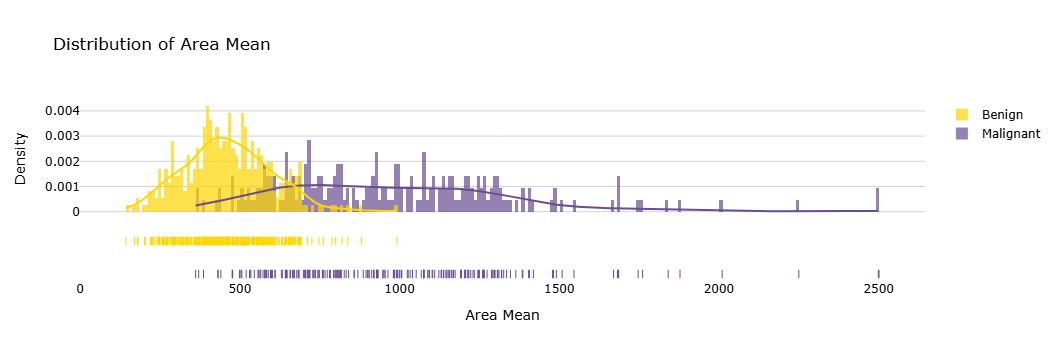

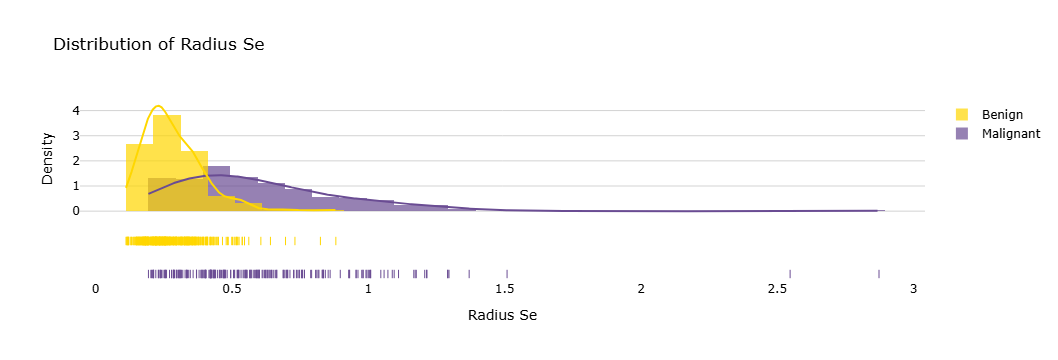

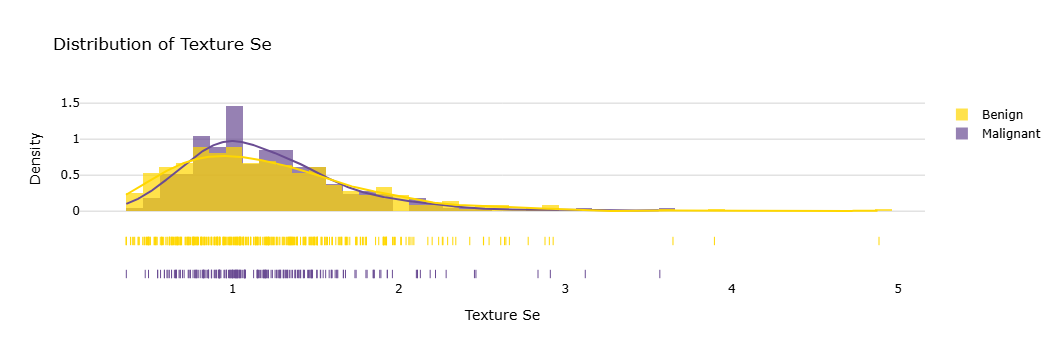

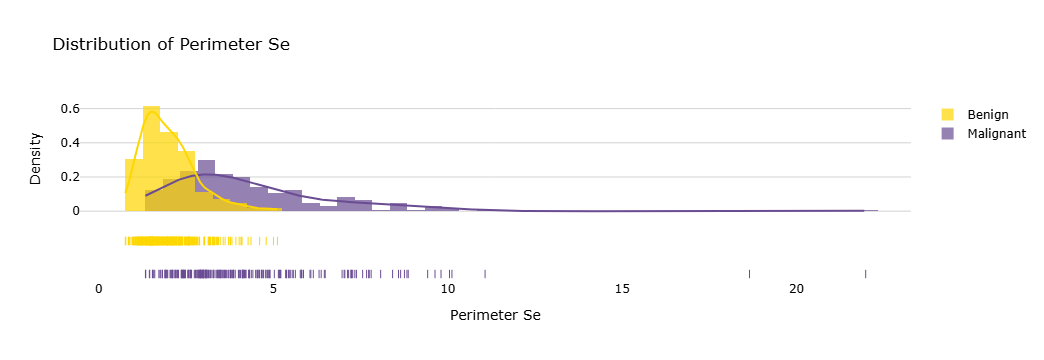

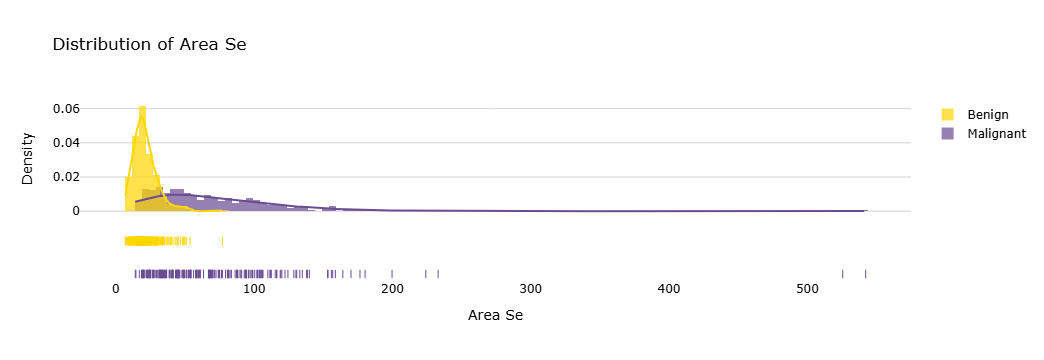

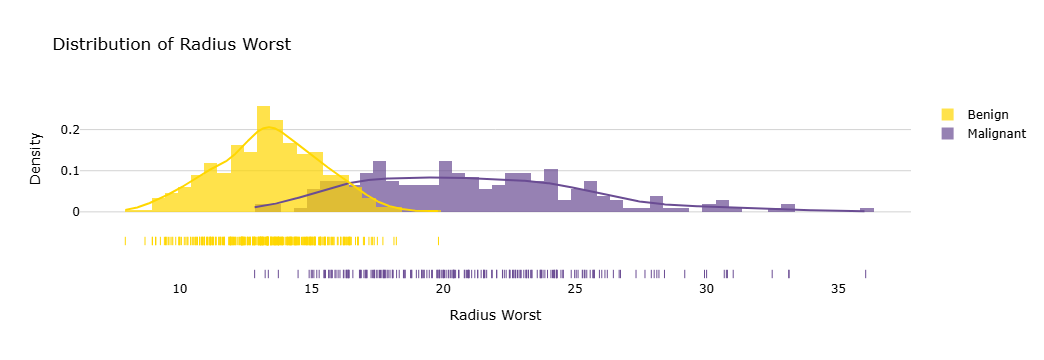

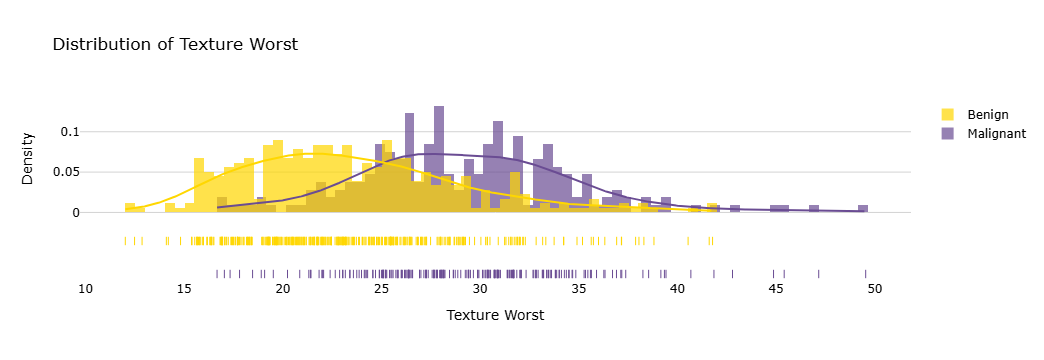

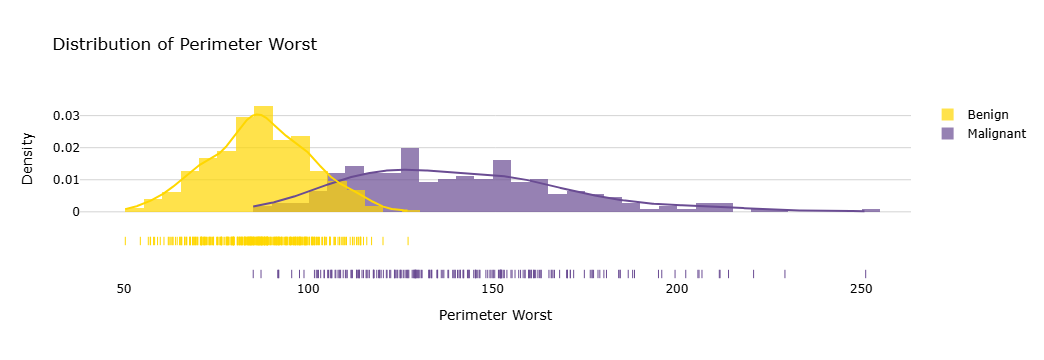

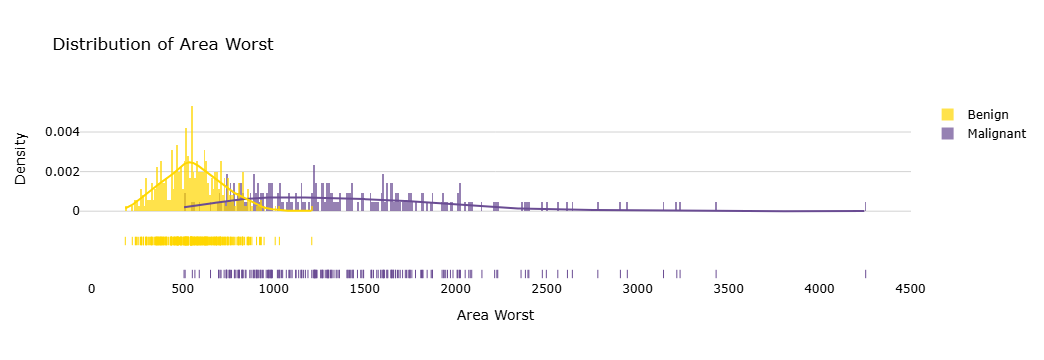

In [26]:
# Mean features
plot_distribution('radius_mean', 0.5)
plot_distribution('texture_mean', 0.5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

# SE features
plot_distribution('radius_se', 0.1)
plot_distribution('texture_se', 0.1)
plot_distribution('perimeter_se', 0.5)
plot_distribution('area_se', 5)

# Worst features
plot_distribution('radius_worst', 0.5)
plot_distribution('texture_worst', 0.5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)


### Feature Correlation

We compute the Pearson correlation matrix to visualize relationships between features. Strong correlations may indicate redundancy or high mutual information.

Highly correlated features like `radius_mean`, `perimeter_mean`, and `area_mean` often represent similar geometric characteristics. This analysis can guide feature selection or dimensionality reduction in future modeling.


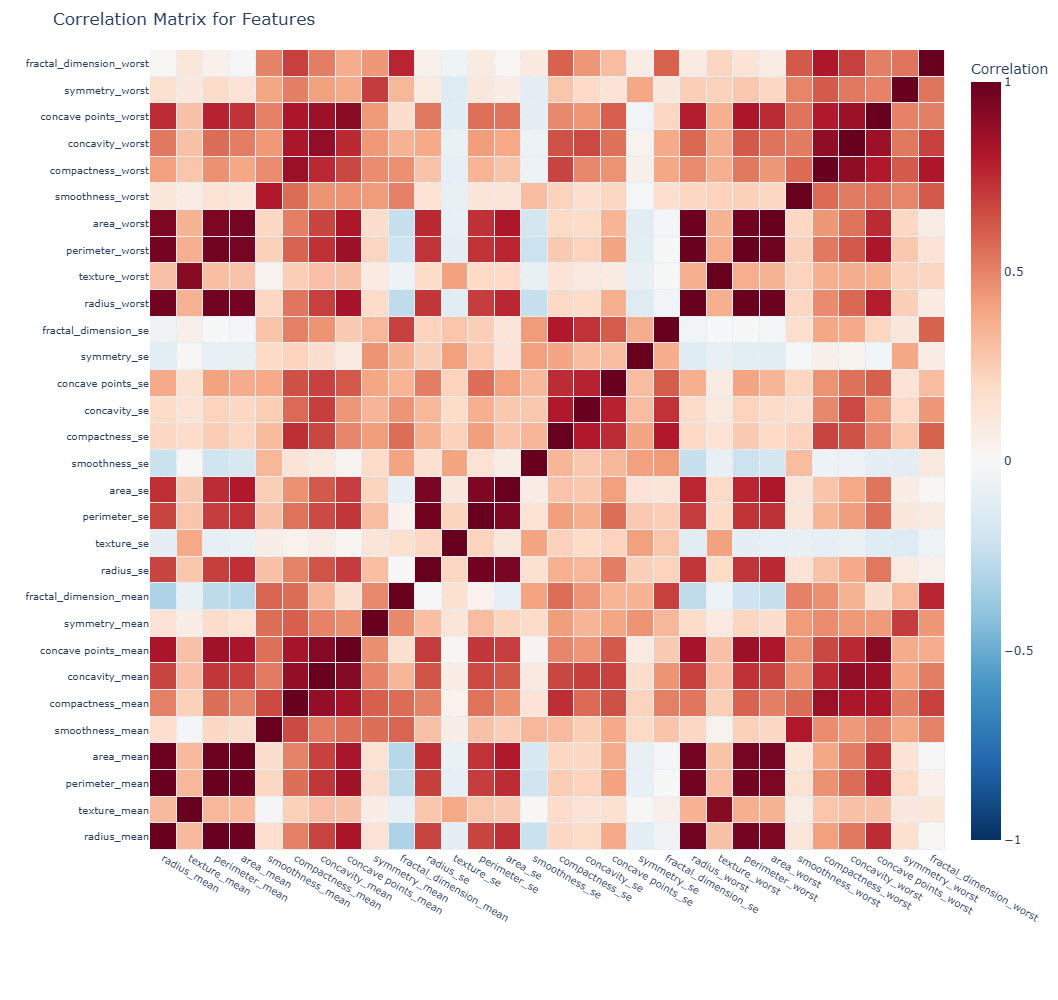

In [29]:
import numpy as np
import plotly.graph_objects as go

# Optional: drop 'id' column before computing correlations
correlation = df.drop(columns=['id']).corr(numeric_only=True)

# Prepare data
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

# Create heatmap
trace = go.Heatmap(
    z=corr_array,
    x=matrix_cols,
    y=matrix_cols,
    xgap=1,
    ygap=1,
    colorscale='RdBu_r',  
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1  # Lock scale range for visual consistency
)

layout = go.Layout(
    title='Correlation Matrix for Features',
    autosize=False,
    height=1000,
    width=1200,
    margin=dict(r=0, l=150, t=50, b=150),
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickfont=dict(size=10))
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


We visualize the Pearson correlation matrix to better understand the relationships between the numeric features.

This heatmap uses a diverging color scale:
- **Red** indicates strong positive correlation (+1),
- **Blue** indicates strong negative correlation (–1),
- **White** indicates no linear correlation (0).

Highly correlated features like `radius_mean`, `area_mean`, and `perimeter_mean` suggest redundancy, as they all describe tumor size. Negative correlations (e.g., between `radius_worst` and `smoothness_se`) may reveal inverse patterns worth exploring further.

Understanding feature correlation is essential to:
- Identify redundant variables (which may be dropped or compressed),
- Avoid multicollinearity in modeling,
- Guide feature selection or dimensionality reduction (e.g., PCA).

## Pairwise Feature Relationships by Diagnosis

We visualize how selected feature pairs relate to each other across benign and malignant classes using scatter plots. These plots are grouped by correlation type:
- Strongly positively correlated,
- Weak or no correlation,
- Strongly negatively correlated.

This approach helps detect how feature interactions differ between tumor types and which pairs may offer greater separation or predictive potential.


In [308]:
M = df[df['diagnosis'] == 'M']
B = df[df['diagnosis'] == 'B']

### Interactive Plotly Scatter Plot Function

We define a flexible function to create interactive 2D scatter plots using Plotly. By selecting any two features, we can visually explore the separation between malignant and benign tumors.

Each plot uses color to indicate diagnosis, allowing us to identify clusters, overlap, or trends in feature relationships that may be useful for modeling.

In [30]:
def plot_feat1_feat2(feat1, feat2):  
    trace0 = go.Scatter(
        x=M[feat1],
        y=M[feat2],
        name='Malignant',
        mode='markers',
        marker=dict(
            color='#6A4C93',
            size=7,
            opacity=0.8,
            line=dict(width=1, color='black')
        )
    )

    trace1 = go.Scatter(
        x=B[feat1],
        y=B[feat2],
        name='Benign',
        mode='markers',
        marker=dict(
            color='#FFD700',
            size=7,
            opacity=0.8,
            line=dict(width=1, color='black')
        )
    )

    layout = dict(
    title=f'{feat1.replace("_", " ").title()} vs {feat2.replace("_", " ").title()}',
    xaxis=dict(
        title=feat1,
        zeroline=False,
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    yaxis=dict(
        title=feat2,
        zeroline=False,
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend=dict(bgcolor='white')
)


    fig = dict(data=[trace0, trace1], layout=layout)
    py.iplot(fig)


### Positively Correlated Feature Pairs

These scatter plots show feature pairs with strong positive correlation. In such cases, both features tend to increase together. Clear class separation can often be observed.

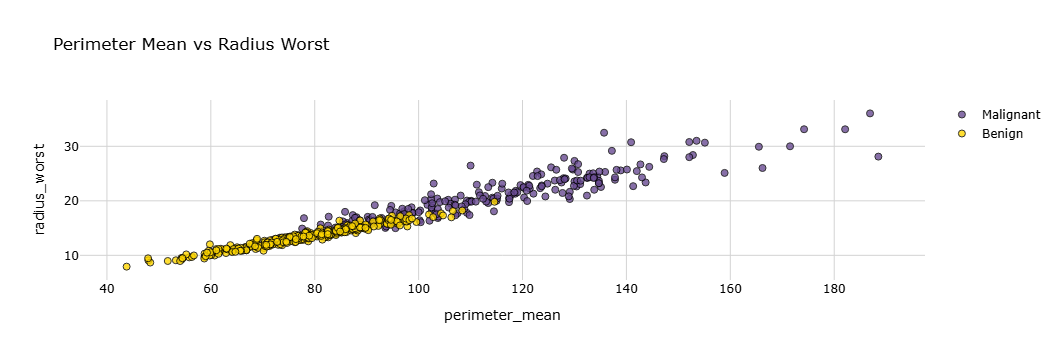

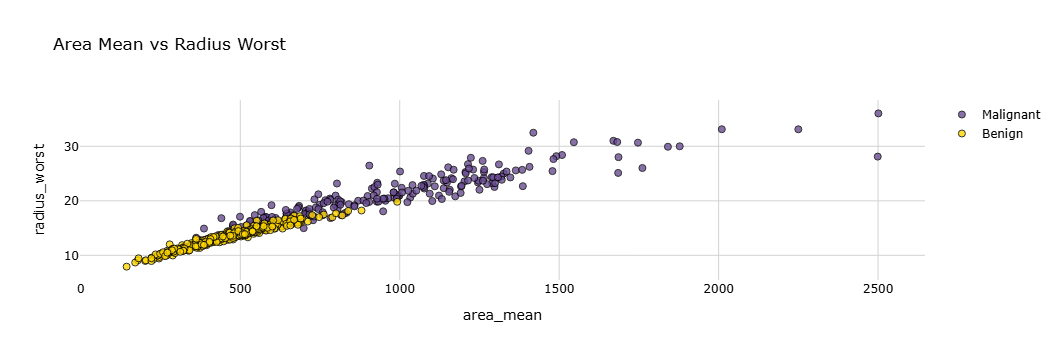

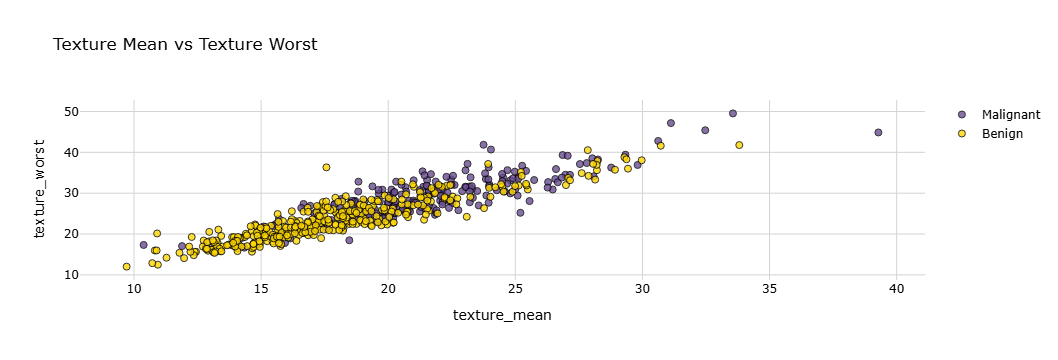

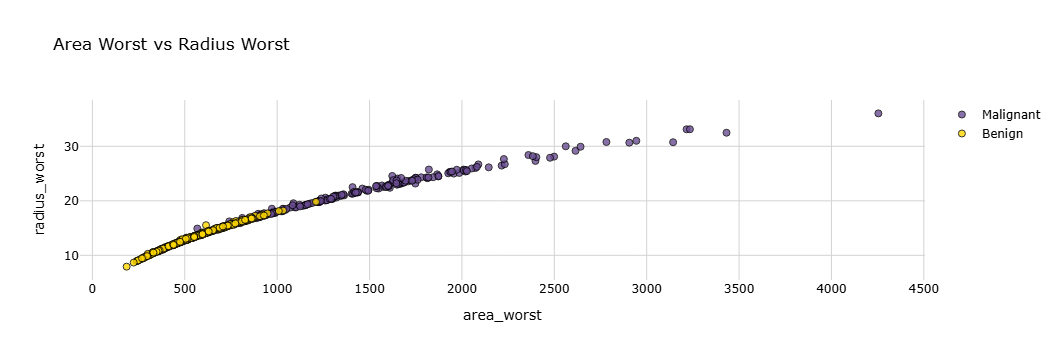

In [31]:
# Plotly interactive scatter plots
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

### Positively Correlated Feature Pairs (Static Seaborn View)

To complement the interactive scatter plots, we include a 2x2 static visualization using Seaborn.

The selected feature pairs show strong positive correlations and are colored by diagnosis, allowing a quick visual comparison between benign and malignant cases.

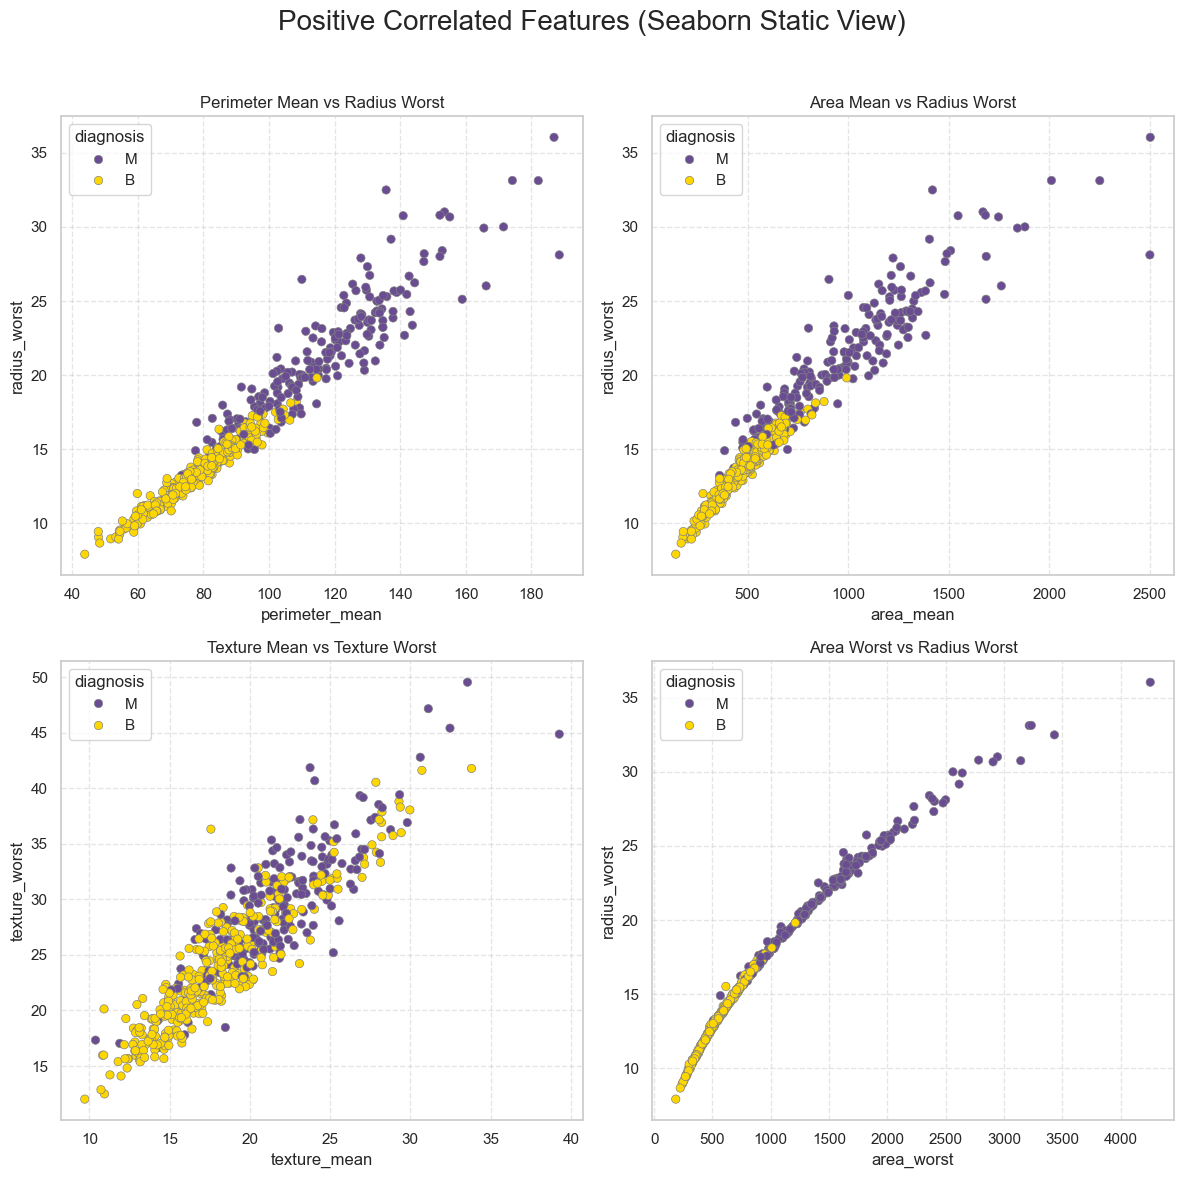

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated palette for diagnosis labels ('B' = benign, 'M' = malignant)
palette = {'B': '#FFD700', 'M': '#6A4C93'}
edgecolor = 'gray'

# Create a 2x2 grid of scatter plots
fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.scatterplot(
    data=df,
    x='perimeter_mean',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Perimeter Mean vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(222)
sns.scatterplot(
    data=df,
    x='area_mean',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Area Mean vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(223)
sns.scatterplot(
    data=df,
    x='texture_mean',
    y='texture_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Texture Mean vs Texture Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(224)
sns.scatterplot(
    data=df,
    x='area_worst',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Area Worst vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

# Super title
fig.suptitle('Positive Correlated Features (Seaborn Static View)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # make space for suptitle

# Optional: Save to file
# plt.savefig('positive_correlated_features.png', dpi=300)

plt.show()


### Uncorrelated Features

In this section, we visualize feature pairs that exhibit little to no correlation. The purpose is to highlight variables that vary independently, which may contribute unique information for classification models.


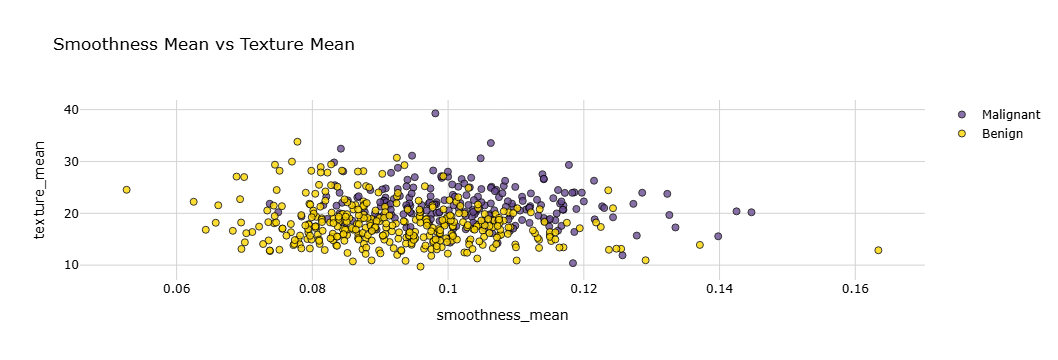

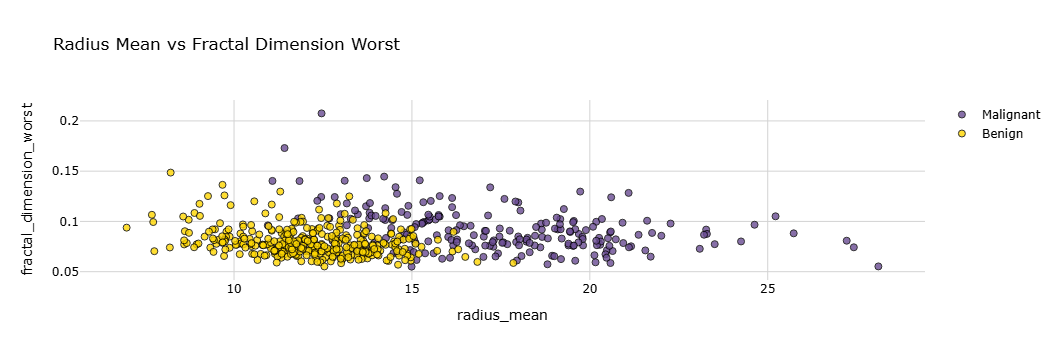

In [312]:
# Plot uncorrelated feature pairs using custom Plotly function
plot_feat1_feat2('smoothness_mean', 'texture_mean')
plot_feat1_feat2('radius_mean', 'fractal_dimension_worst')
plot_feat1_feat2('texture_mean', 'symmetry_mean')
plot_feat1_feat2('texture_mean', 'symmetry_se')


### Uncorrelated Feature Pairs (Static Seaborn View)

We present a static 2x2 grid using Seaborn to visualize pairs of features with low or no correlation. This layout helps highlight feature combinations where no clear linear or nonlinear relationship exists. The diagnostic classes are color-coded to reveal whether separation is still observable in uncorrelated feature spaces.

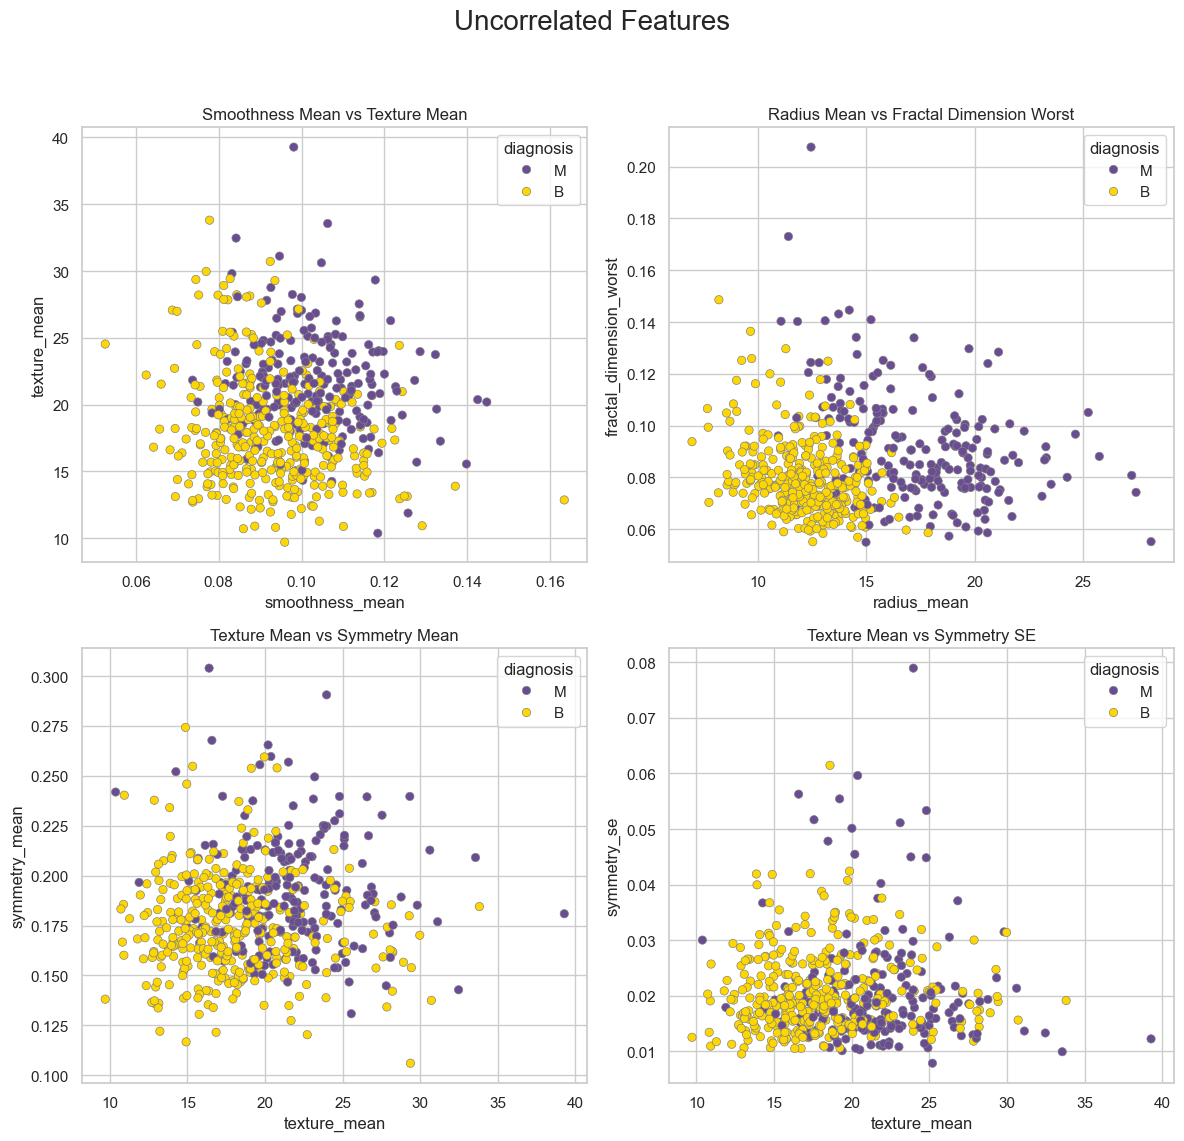

In [33]:
# Seaborn visualization: Uncorrelated feature pairs
palette = {"B": "#FFD700", "M": "#6A4C93"}
edgecolor = 'grey'

fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.scatterplot(x=df['smoothness_mean'], y=df['texture_mean'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Smoothness Mean vs Texture Mean')

plt.subplot(222)
sns.scatterplot(x=df['radius_mean'], y=df['fractal_dimension_worst'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Radius Mean vs Fractal Dimension Worst')

plt.subplot(223)
sns.scatterplot(x=df['texture_mean'], y=df['symmetry_mean'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Texture Mean vs Symmetry Mean')

plt.subplot(224)
sns.scatterplot(x=df['texture_mean'], y=df['symmetry_se'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Texture Mean vs Symmetry SE')

fig.suptitle('Uncorrelated Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('uncorrelated_features.png')
plt.show()


### Negatively Correlated Feature Pairs (Interactive View)

We visualize pairs of features that show negative correlation — meaning as one increases, the other tends to decrease.

Using interactive scatter plots, we examine how these inverse relationships distribute across malignant and benign tumors. These insights may reveal contrasting structural properties that help improve classification performance.


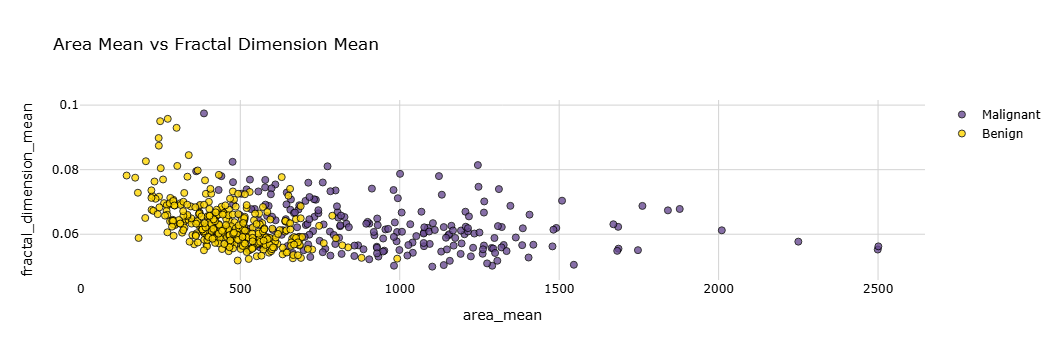

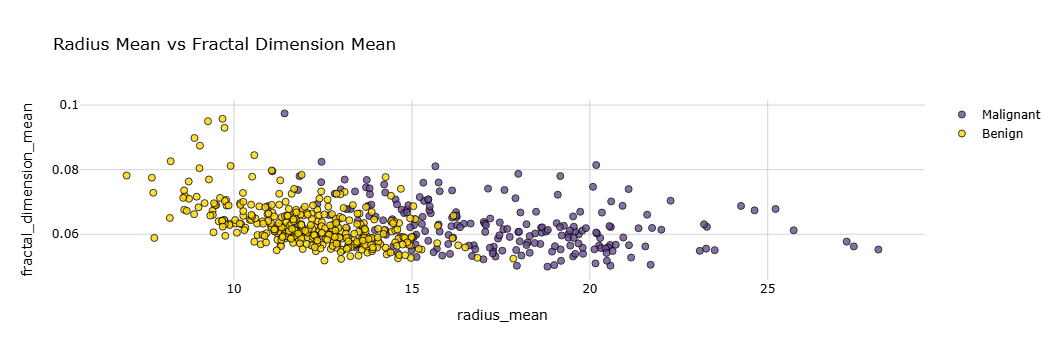

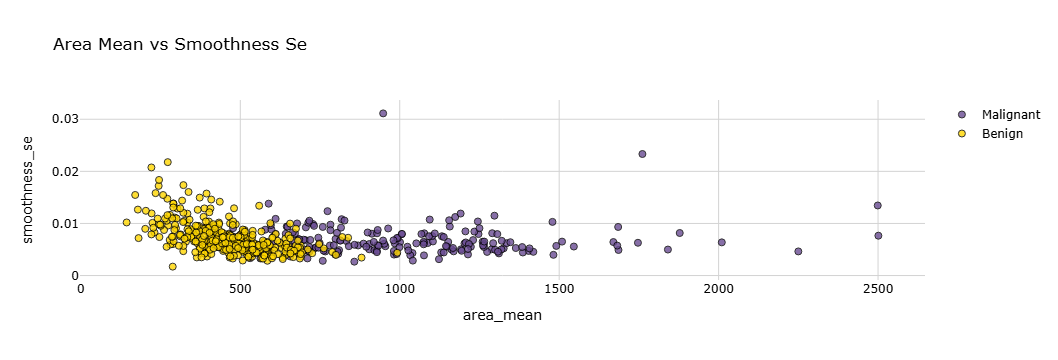

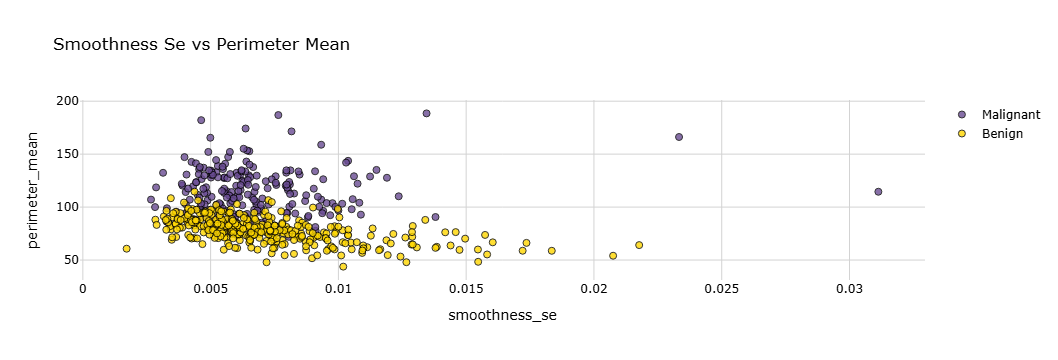

In [314]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

### Negatively Correlated Feature Pairs (Static Seaborn View)

This static 2x2 grid provides a clear visual comparison of negatively correlated feature pairs. These inverse relationships can reveal how certain characteristics differ between benign and malignant tumors, offering complementary insights to the positively correlated features seen earlier.


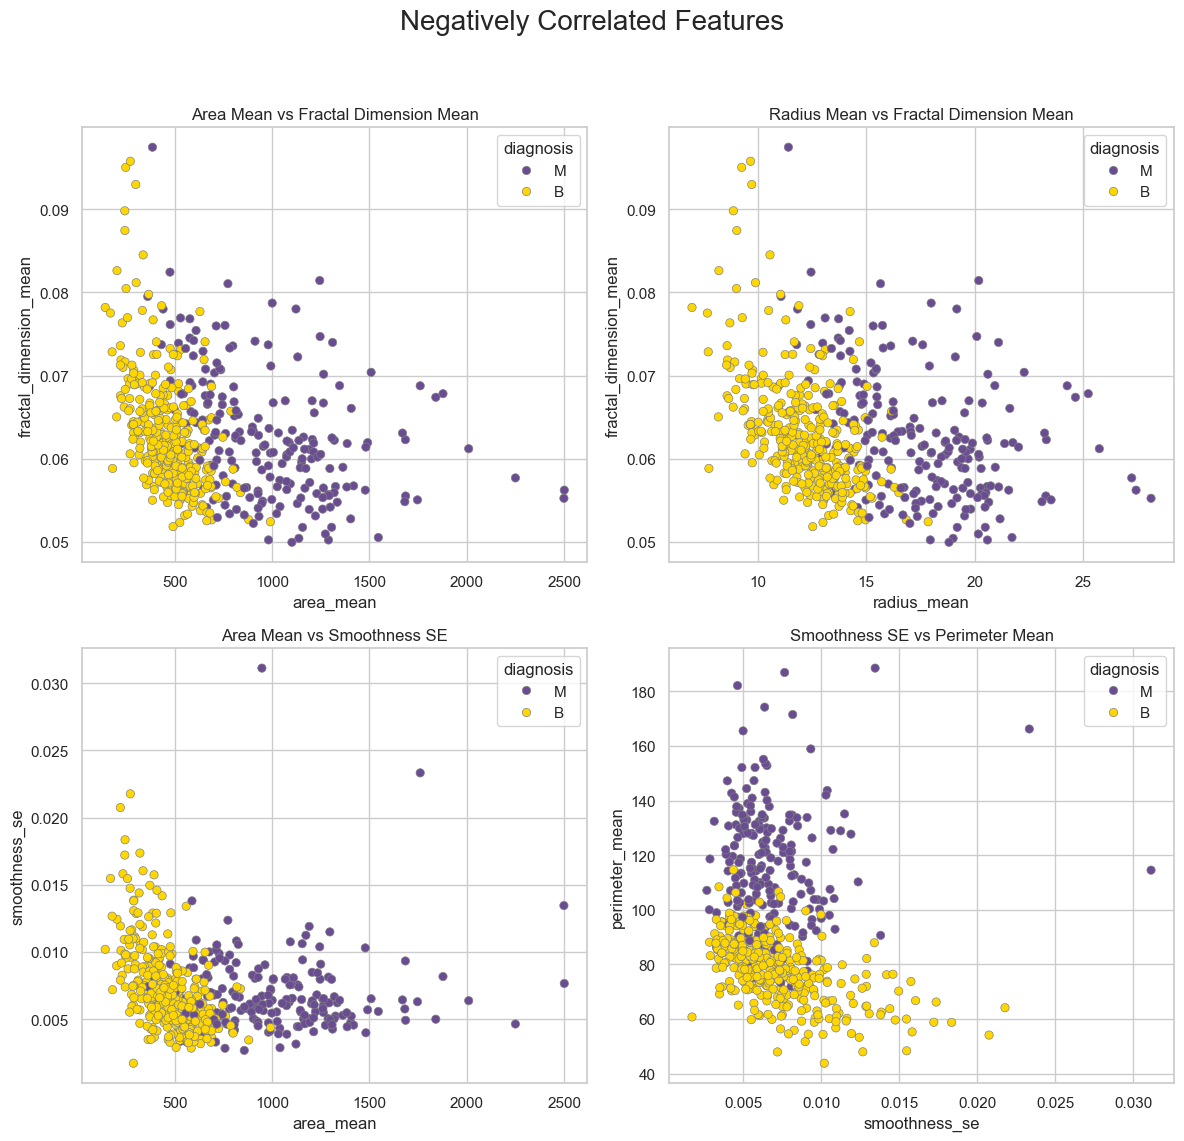

In [315]:
# Seaborn version – Negatively Correlated Feature Pairs
fig = plt.figure(figsize=(12, 12))

# Plot 1
plt.subplot(221)
sns.scatterplot(
    x=df['area_mean'], y=df['fractal_dimension_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Area Mean vs Fractal Dimension Mean')

# Plot 2
plt.subplot(222)
sns.scatterplot(
    x=df['radius_mean'], y=df['fractal_dimension_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Radius Mean vs Fractal Dimension Mean')

# Plot 3
plt.subplot(223)
sns.scatterplot(
    x=df['area_mean'], y=df['smoothness_se'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Area Mean vs Smoothness SE')

# Plot 4
plt.subplot(224)
sns.scatterplot(
    x=df['smoothness_se'], y=df['perimeter_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Smoothness SE vs Perimeter Mean')

# Super title and layout
fig.suptitle('Negatively Correlated Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('negatively_correlated_features.png', dpi=300)
plt.show()


### Data Preprocessing: Feature Selection and Scaling

Before applying dimensionality reduction techniques or machine learning algorithms, we perform several essential preprocessing steps:

- **Drop Non-Informative Features**: Columns like `id` and any unnamed columns are removed, as they do not contribute meaningful information.
- **Encode Target Variable**: The `diagnosis` column is converted into a binary format — `0` for Benign (B) and `1` for Malignant (M).
- **Standardize Features**: All numerical features are scaled using `StandardScaler` to have zero mean and unit variance, ensuring fair treatment across features.

These steps are crucial for improving model performance and ensuring compatibility with various ML techniques.


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
# df = pd.read_csv('path_to_your_dataset.csv') 

#### Step 1: Drop Non-Informative Features

In [36]:
cols_to_drop = ['id', 'Unnamed: 32']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
dfFun = df.drop(columns=existing_cols_to_drop)

#### Step 2: Encode Target Variable


In [37]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
# 'B' becomes 0, 'M' becomes 1

#### Step 3: Feature Scaling
 Separate features and target variable

In [38]:
# Separate features and target variable
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Optionally, convert back to a DataFrame for easier interpretation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display first few rows of preprocessed data
print(features_scaled_df.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403     1.829821     -0.353632        1.685955   1.908708   
2  0.431741     1.579888      0.456187        1.566503   1.558884   
3  0.432121    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293 

### Classification Models on All Scaled Features
In this section, we train and evaluate several classification algorithms using the full set of standardized features from the breast cancer dataset.

The main goals are:
- To assess how well each model performs using all diagnostic measurements.
- To establish a performance benchmark without applying dimensionality reduction.
- To later compare these results against models trained on transformed or reduced feature sets (e.g., via PCA).

This approach helps us understand the value of working with the full feature space versus compressed representations.

#### Step 1: Split the Dataset into Training and Test Sets
We separate the data into 70% training and 30% testing sets using train_test_split. This ensures the models are evaluated on unseen data for generalization.


In [39]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target
X = features_scaled_df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Step 2: Define the Classification Models
We use four commonly applied supervised learning algorithms: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Random Forest.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}


#### Step 3: Train and Evaluate Each Model
Each model is trained on the training data and evaluated on the test set using accuracy_score and a detailed classification_report.

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model performance
results_full = {}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} (All Features) ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    results_full[name] = acc


--- Logistic Regression (All Features) ---
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



--- K-Nearest Neighbors (All Features) ---
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



--- Support Vector Machine (All Features) ---
Accuracy: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   suppo

#### Step 4: Visualize Model Accuracy
To complement textual metrics, we visualize the accuracy of each classification model using a bar chart. This makes performance differences easier to interpret at a glance.

The chart clearly highlights which models perform best on the full feature set and serves as a visual benchmark for future comparisons (e.g., after dimensionality reduction).

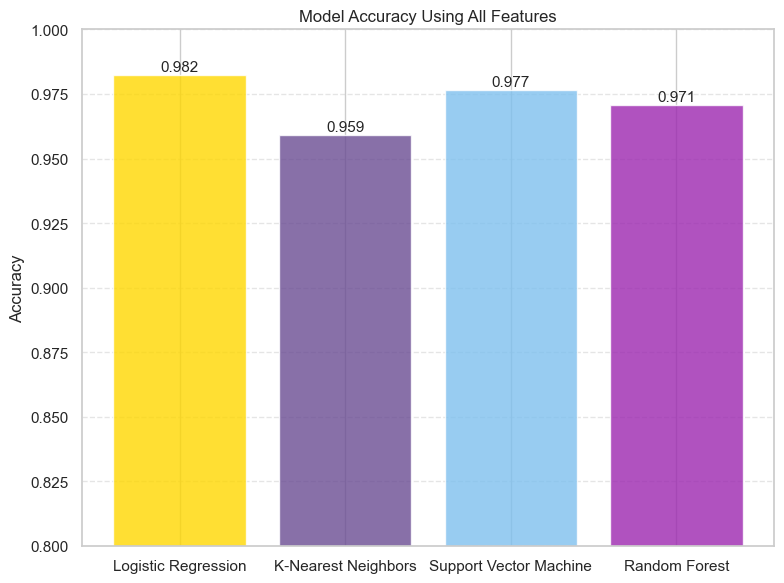

In [45]:
import matplotlib.pyplot as plt

# Plot model performance
plt.figure(figsize=(8, 6))
bars = plt.bar(results_full.keys(), results_full.values(),
               color=['#FFD700', '#6A4C93', '#7EC0EE', '#9C27B0'], alpha=0.8)
plt.title('Model Accuracy Using All Features')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

### PCA: Dimensionality Reduction and Visualization

Principal Component Analysis (PCA) is a statistical method used to reduce the number of features in a dataset while preserving as much variance as possible.

In this notebook, PCA is used for two main purposes:
1. **2D Visualization** – to explore how well the data separates into benign and malignant classes in a reduced feature space.
2. **Efficient Modeling** – to provide a compressed representation that may improve training speed and reduce overfitting in machine learning models.

The ultimate goal is not only computational efficiency, but also gaining insight into how separable the classes are from a geometrical perspective.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

**Before visualizing the data in two dimensions, we first examine how much variance is captured by each principal component.**

This plot shows the cumulative explained variance — that is, the total amount of information retained as we increase the number of components. A steep initial increase indicates that most of the variance is captured by the first few components, justifying dimensionality reduction.

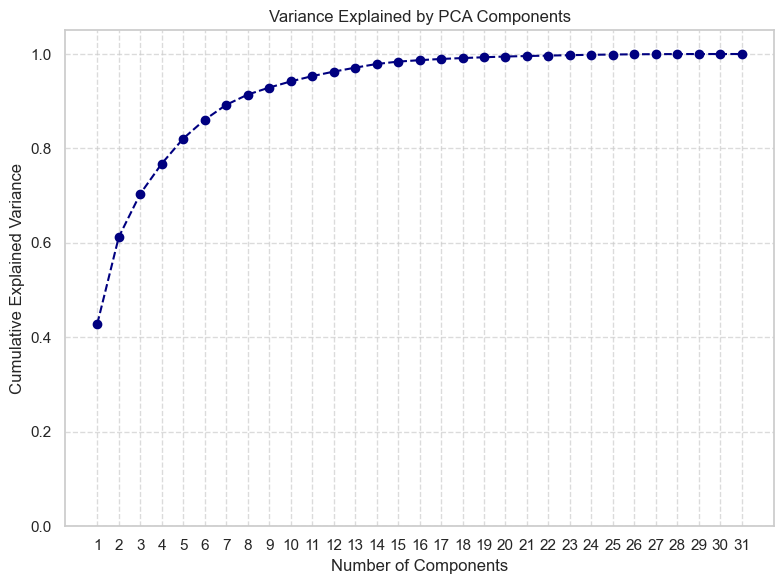

In [49]:
# Plot cumulative explained variance
pca_full = PCA()
pca_full.fit(features_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(
    np.arange(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    linestyle='--',
    color='navy'
)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.xticks(np.arange(1, len(cumulative_variance) + 1))
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Using the first two principal components, we project the high-dimensional data into a 2D space. Each point represents a tumor sample, colored by diagnosis.

This visualization helps us observe how well the classes (benign vs malignant) separate in a reduced feature space. A clear separation suggests that the diagnostic features contain strong discriminative power even after dimensionality reduction.

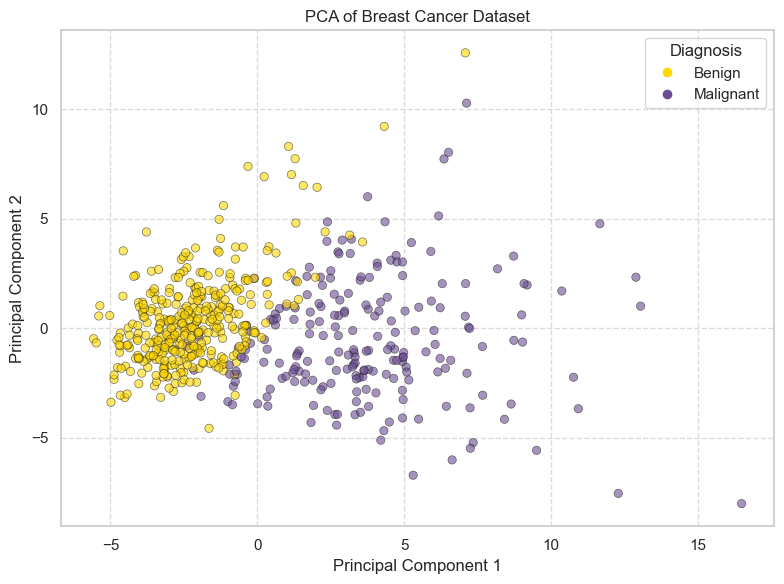

In [50]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create DataFrame with principal components and diagnosis label
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis'].values

# Define custom colors: Yellow for Benign (0), Purple for Malignant (1)
colors = ['#FFD700' if label == 0 else '#6A4C93' for label in pca_df['diagnosis']]

# Plot PCA scatter
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=colors,
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.grid(True, linestyle='--', alpha=0.7)

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Benign',
           markerfacecolor='#FFD700', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Malignant',
           markerfacecolor='#6A4C93', markersize=8)
]
plt.legend(handles=legend_elements, title='Diagnosis')
plt.tight_layout()
plt.show()



#### PCA: 3D Scatter Plot Visualization
To further explore the structure of the data, we extend the PCA visualization to 3 components. This provides a deeper spatial perspective of class separation in the transformed feature space. 


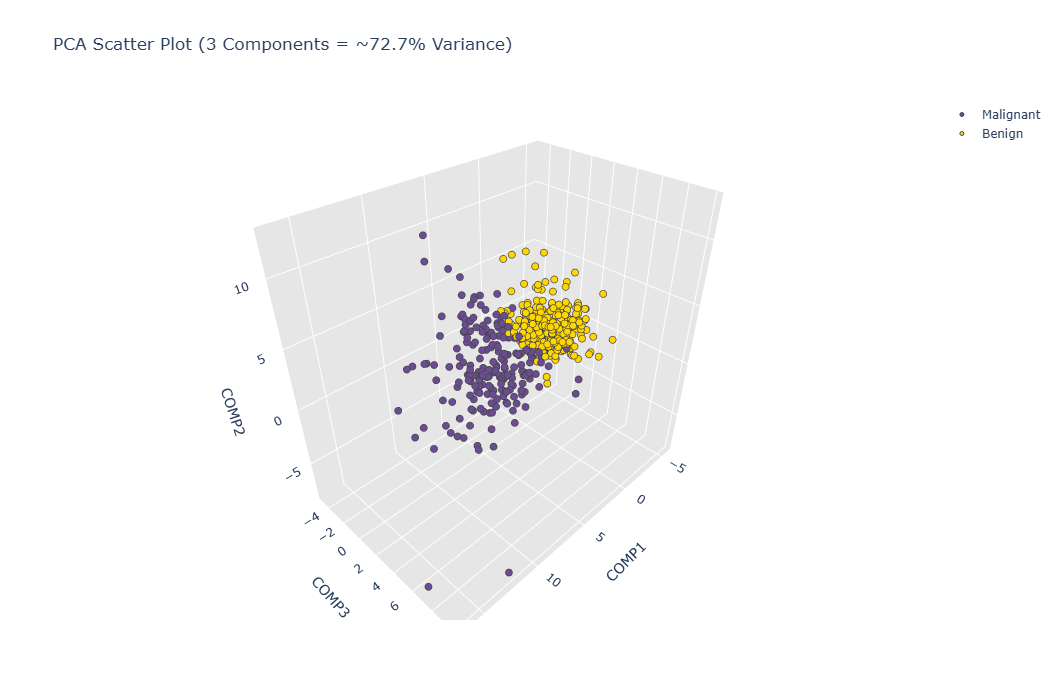

In [51]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features_scaled)

# Create DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['COMP1', 'COMP2', 'COMP3'])
pca_df['diagnosis'] = df['diagnosis'].replace({1: 'malignant', 0: 'benign'})

# Split by class
M_pca = pca_df[pca_df['diagnosis'] == 'malignant']
B_pca = pca_df[pca_df['diagnosis'] == 'benign']

# 3D scatter plot
trace1 = go.Scatter3d(
    x=M_pca['COMP1'], y=M_pca['COMP3'], z=M_pca['COMP2'],
    mode="markers", name="Malignant",
    marker=dict(size=4, color='#6A4C93', line=dict(width=1))
)

trace2 = go.Scatter3d(
    x=B_pca['COMP1'], y=B_pca['COMP3'], z=B_pca['COMP2'],
    mode="markers", name='Benign',
    marker=dict(size=4, color='#FFD700', line=dict(width=1))
)

layout = go.Layout(
    title='PCA Scatter Plot (3 Components = ~72.7% Variance)',
    scene=dict(
        xaxis=dict(title='COMP1', backgroundcolor='rgb(230, 230,230)',
                   gridcolor='white', zerolinecolor='white'),
        yaxis=dict(title='COMP3', backgroundcolor='rgb(230, 230,230)',
                   gridcolor='white', zerolinecolor='white'),
        zaxis=dict(title='COMP2', backgroundcolor='rgb(230, 230,230)',
                   gridcolor='white', zerolinecolor='white')
    ),
    height=700
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


### Classification Using PCA-Reduced Features

To evaluate the impact of dimensionality reduction, we train the same set of classification models on PCA-transformed data, using only the first two principal components.

The four models tested are:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Random Forest

Although PCA simplifies the feature space and may improve training efficiency, it can also result in information loss. This section helps assess the trade-off between model simplicity and classification performance.


 #### Import libraries

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


#### Step 1: Split the Dataset into Training and Test Sets

In [53]:
# Prepare PCA input and target
X_pca = principal_components  # Already reduced to 2 components
y_pca = df['diagnosis']       # 0 = Benign, 1 = Malignant

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)


#### Step 2: Define the Classification Models

In [54]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}


#### Step 3: Train and Evaluate Each Model

In [55]:
# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    results[name] = acc


--- Logistic Regression ---
Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



--- K-Nearest Neighbors ---
Accuracy: 0.9532163742690059
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



--- Support Vector Machine ---
Accuracy: 0.935672514619883
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.9

#### Step 4: Visualize Model Accuracy

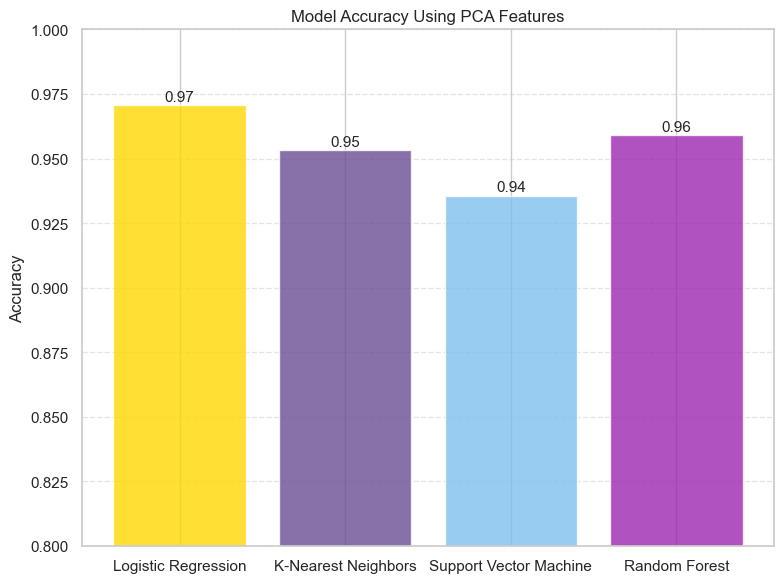

In [56]:
# Plot model accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['#FFD700', '#6A4C93', '#7EC0EE', '#9C27B0'], alpha=0.8)
plt.title('Model Accuracy Using PCA Features')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate accuracy on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


This bar chart shows the classification accuracy of each model when trained on only the first two principal components (PC1 and PC2).

While performance remains reasonably high, it is generally lower than when using the full feature set. This outcome highlights the trade-off between simplicity and performance.

Using PCA with two components is helpful for visualization and dimensionality reduction, but it may not capture enough information for maximum predictive performance.

## Final Insights and Comparative Summary

This analysis compared the performance of four classical machine learning algorithms—**Logistic Regression**, **K-Nearest Neighbors**, **Support Vector Machine**, and **Random Forest**—applied to two representations of the breast cancer dataset:  
1. the **full set of standardized features**, and  
2. a **dimensionally reduced version** using the first two principal components via **PCA**.

The results indicate that models trained on the complete feature set consistently achieve **higher accuracy**, with **Logistic Regression** and **SVM** exceeding **97%**, confirming the predictive strength of the original variables.

In contrast, models trained on the two-component PCA representation experience a **modest decline in accuracy**, as expected due to information loss during dimensionality reduction. Nevertheless, performance remains competitive, highlighting PCA’s value for **exploratory analysis**, **visualization**, and **computational efficiency**, particularly in early stages of data exploration.

---

### Key Takeaways

- Models trained on the **full feature space** outperform PCA-based models, albeit not by a large margin—indicating **strong class structure** in the data.
- **Logistic Regression** demonstrates high accuracy and interpretability, making it a reliable baseline.
- **SVM** and **Random Forest** consistently perform well, suggesting suitability for robust classification.
- **Dimensionality reduction** can be beneficial for visualization and runtime optimization, but may reduce predictive performance and interpretability.

---

### Future Directions

- Incorporate **ROC-AUC analysis** to better understand classifier discrimination thresholds and confidence.
- Use **feature importance metrics** (e.g., from Random Forest) to identify the most influential variables in diagnosis.
- Apply **hyperparameter optimization** and **ensemble techniques** to further enhance model performance.
- Explore alternative dimensionality reduction techniques such as **t-SNE** or **UMAP** for improved class separability in visual space.
- Investigate **deep learning approaches** for potential gains on more complex or larger biomedical datasets.

---

### Conclusion

This notebook provides a strong foundation for building more advanced diagnostic tools and highlights the potential of classical machine learning models to effectively analyze structured biomedical data. The balance between dimensionality, interpretability, and performance remains a central consideration in the development of real-world clinical decision support systems.
